In [1]:
exec(open("init_notebook.py", "r").read())
%load_ext autoreload

current working dirD:\ML\rl\ddpg


In [2]:

import sys
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *
import torch
import numpy as np

In [3]:
env = NormalizedEnv(gym.make("Pendulum-v1"))

In [4]:
env.action_space

Box([-2.], [2.], (1,), float32)

In [5]:
num_states = env.observation_space.shape[0]
print("Size of State Space ->  {}".format(num_states))
num_actions = env.action_space.shape[0]
print("Size of Action Space ->  {}".format(num_actions))

upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]

print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  3
Size of Action Space ->  1
Max Value of Action ->  2.0
Min Value of Action ->  -2.0


In [6]:
agent = DDPGagent(env)
noise = OUNoise(env.action_space, decay_period=100) # default decay is 10K. So, an episode will not have too much deviation.
batch_size = 128
rewards = []
avg_rewards = []

In [7]:
for episode in range(50):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    
    # print(f"Episode {episode}")
    
    for step in range(500):
        env.render() 
        action = agent.get_action(state)
        action = noise.get_action(action, step)
#         print(action)
        new_state, reward, done, _ = env.step(action) 
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            agent.update(batch_size)        
        
        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode,l np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))
env.close()

C:\Users\adhocmaster\anaconda3\envs\pytorch37\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\adhocmaster\anaconda3\envs\pytorch37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\adhocmaster\anaconda3\envs\pytorch37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


episode: 0, reward: -1588.02, average _reward: nan 
episode: 1, reward: -1676.36, average _reward: -1588.0205885971036 
episode: 2, reward: -1570.03, average _reward: -1632.1895760999794 
episode: 3, reward: -1578.4, average _reward: -1611.470739675151 
episode: 4, reward: -989.09, average _reward: -1603.2036641077736 
episode: 5, reward: -1238.05, average _reward: -1480.3808342735294 
episode: 6, reward: -1439.52, average _reward: -1439.9926830003042 
episode: 7, reward: -1350.84, average _reward: -1439.9248011438538 
episode: 8, reward: -781.62, average _reward: -1428.788737538222 
episode: 9, reward: -643.82, average _reward: -1356.880592866981 
episode: 10, reward: -490.04, average _reward: -1285.5746793497483 
episode: 11, reward: -500.19, average _reward: -1175.7769315667535 
episode: 12, reward: -382.05, average _reward: -1058.1598938569864 
episode: 13, reward: -583.97, average _reward: -939.3618485654818 
episode: 14, reward: -730.09, average _reward: -839.9183486516356 
episo

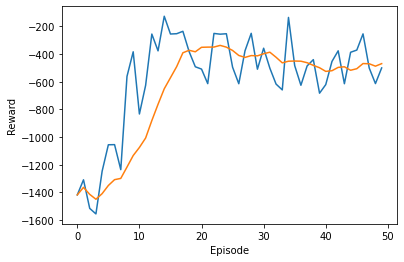

In [8]:
env.close()
plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [9]:
for episode in range(10):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    
    print(f"Episode {episode}")
    
    for step in range(500):
        env.render() 
        # action = agent.get_action(state)
        action = agent.get_action_target(state)
        # action = noise.get_action(action, step)
#         print(action)
        new_state, reward, done, _ = env.step(action) 
        state = new_state
        episode_reward += reward

        if done:
            sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))
env.close()

Episode 0
episode: 0, reward: -10.77, average _reward: -469.46624223578067 
Episode 1
episode: 1, reward: -125.43, average _reward: -408.4412248308698 
Episode 2
episode: 2, reward: -127.46, average _reward: -375.61404708569563 
Episode 3
episode: 3, reward: -251.95, average _reward: -350.6876065448313 
Episode 4
episode: 4, reward: -131.91, average _reward: -314.41378769848603 
Episode 5
episode: 5, reward: -125.4, average _reward: -288.87511821122183 
Episode 6
episode: 6, reward: -261.49, average _reward: -264.28339017365136 
Episode 7
episode: 7, reward: -11.25, average _reward: -264.99993905336 
Episode 8
episode: 8, reward: -248.92, average _reward: -215.9873906480691 
Episode 9
episode: 9, reward: -12.92, average _reward: -179.5118417807849 


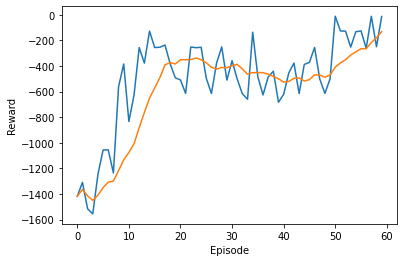

In [10]:
env.close()
plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [8]:
state_batch, action_batch, reward_batch, next_state_batch, done_batch = agent.memory.sample(2)

In [9]:
next_state_batch

array([[ 0.93711823, -0.34901202,  1.4282559 ],
       [ 0.98099744,  0.19402081, -0.07156344]], dtype=float32)

In [10]:
state_batch

array([[ 0.909827  , -0.4149878 ,  1.4845594 ],
       [ 0.9802969 ,  0.19752973, -0.17763457]], dtype=float32)

In [11]:
action_batch

array([[ 0.84979103],
       [-0.14025392]])

In [12]:
reward_batch

array([[-0.40640383],
       [-0.04277039]])

In [19]:
r = np.asarray(reward_batch)

In [20]:
r

array([[-0.02179232],
       [-3.63834091]])

In [27]:
states = torch.FloatTensor(np.asarray(state_batch))

In [28]:
states

tensor([[0.9943, 0.1064, 0.2983],
        [0.0333, 0.9994, 3.5699]])